# Titanic EDA Project

# 1. Introduction

This project performs exploratory data analysis (EDA) on the Titanic dataset.
We analyze passenger characteristics and their relationship to survival.
# 2. Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# 3. Load Dataset

In [10]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Data Cleaning and Inspection

In [11]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5. Strip column names in case there are trailing spaces, fill missing values and drop 'Cabin' due to too many missing values.

In [12]:
df.columns = df.columns.str.strip()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Survival Count

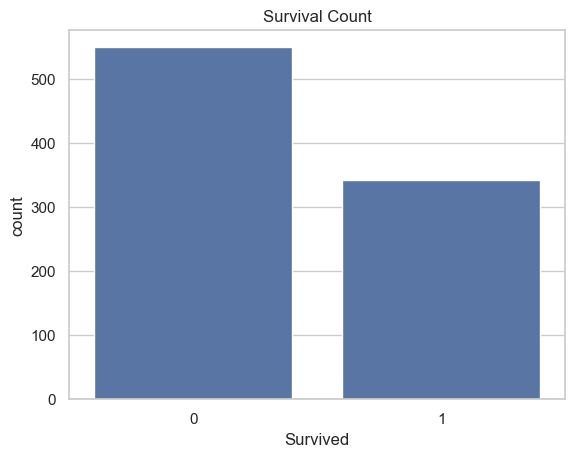

In [13]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Gender Distribution

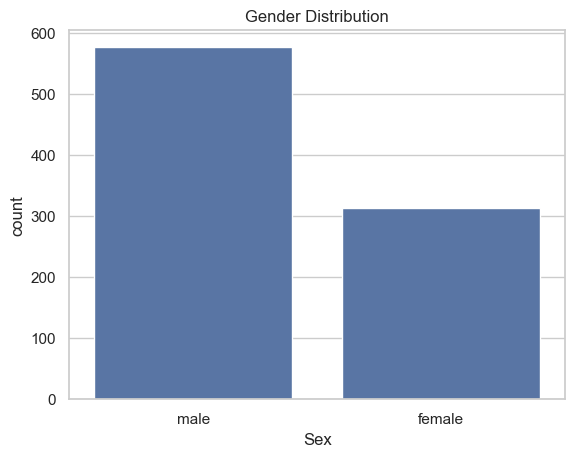

In [14]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


# Passenger Class Distribution

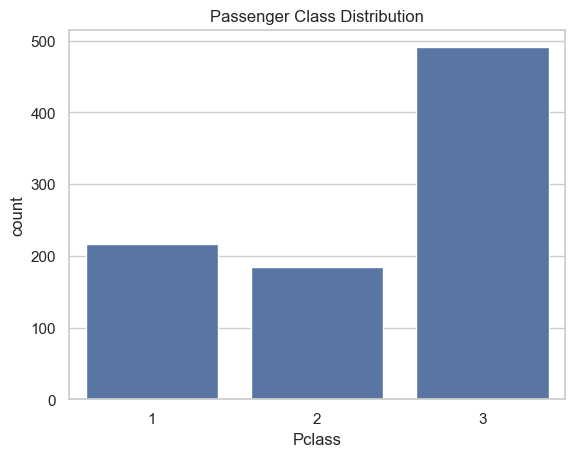

In [15]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


# Age Distribution

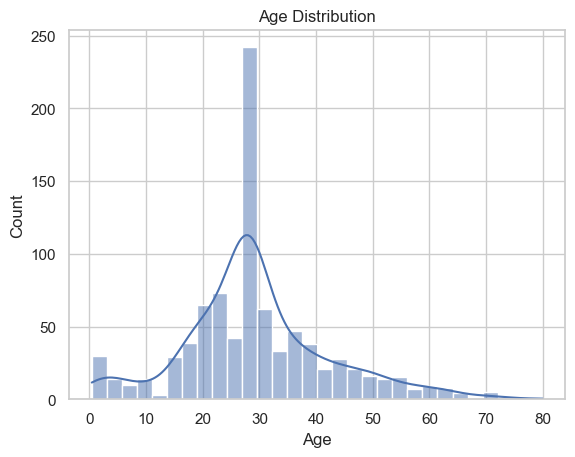

In [16]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


# Fare by Class

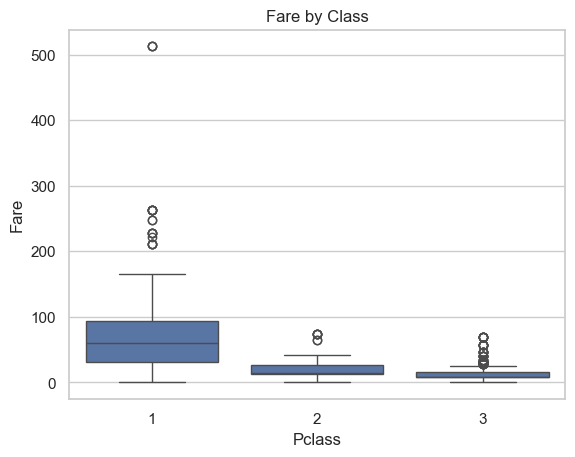

In [17]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Class")
plt.show()

# Survival Rate by Gender

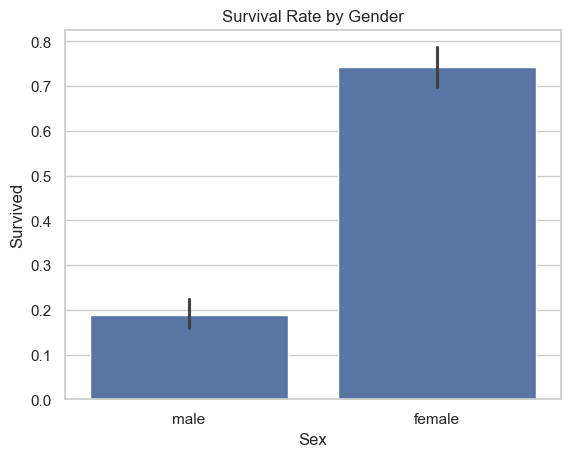

In [18]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


# Survival Rate by Class

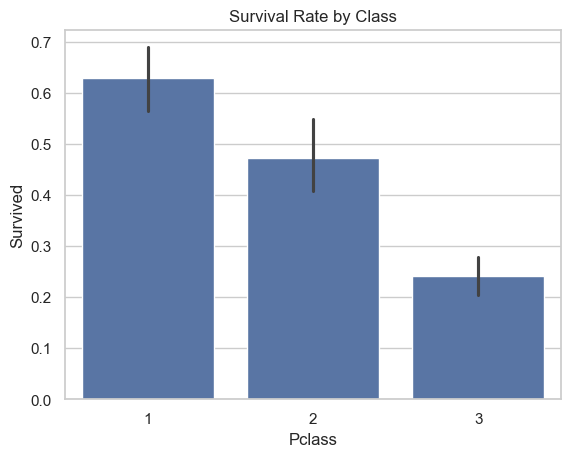

In [19]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()


# Age vs Survival

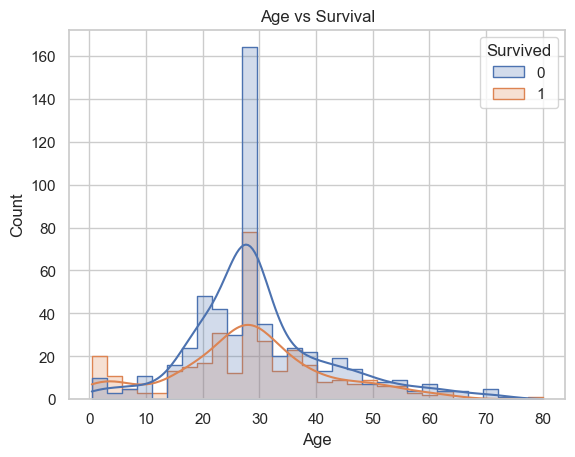

In [20]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element="step")
plt.title("Age vs Survival")
plt.show()

# Correlation Matrix

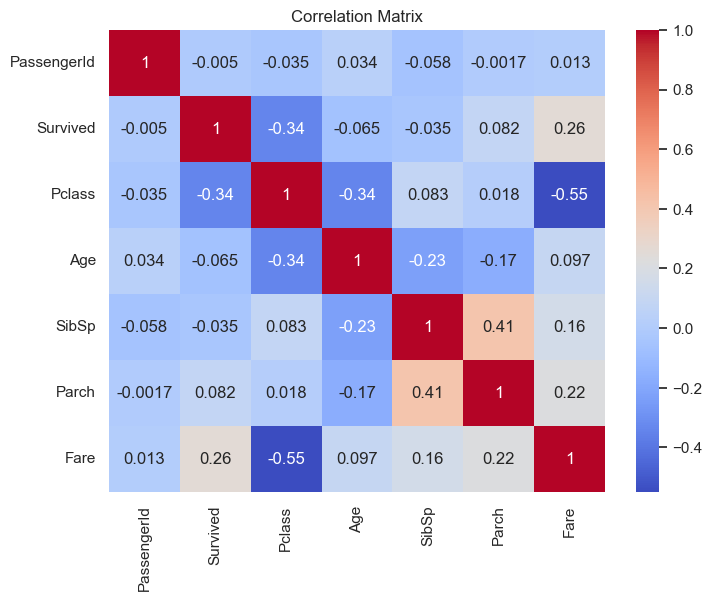

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Insights

In [22]:
insights = {
    "Higher survival": ["Women", "1st class passengers", "Younger passengers"],
    "Lower survival": ["Men", "3rd class passengers", "Older passengers"],
    "Correlation Highlights": {
        "Pclass vs Survival": "Clear negative relationship (higher class → higher survival)",
        "Fare": "Higher fare slightly linked with survival",
        "Age": "Slight survival advantage for younger individuals"
    }
}

for key, value in insights.items():
    print(f"{key}:")
    if isinstance(value, list):
        for item in value:
            print(f"  - {item}")
    else:
        for sub_key, insight in value.items():
            print(f"  {sub_key}: {insight}")

Higher survival:
  - Women
  - 1st class passengers
  - Younger passengers
Lower survival:
  - Men
  - 3rd class passengers
  - Older passengers
Correlation Highlights:
  Pclass vs Survival: Clear negative relationship (higher class → higher survival)
  Fare: Higher fare slightly linked with survival
  Age: Slight survival advantage for younger individuals


# Conclusion
This EDA showed that social and economic factors had a strong influence on survival:
- Women and children were more likely to survive.
- Passengers in 1st class had better access to lifeboats.
These insights can guide future predictive modeling or deeper causal analysis.